 #### 1.2 - Define functions to be used
   * def check_column(series, nlargest):
   * def log_z(col):
   * def rem_out_z(col_name):
   * def multiplot(df):
   * def plot_hist_scat(df,target,stats):
   * def plot_hist_scat_sns(df,target,stats):
   * def detect_outliers(df,n,features): (using IQRs)

In [ ]:

# check for duplicate id's
df['id'].duplicated().value_counts()


# Looks like there are in fact some duplicate ID's. 
# let's flag the duplicate id's in df with a new column 'is_dupe':

# first save a 'backup' copy of current dataset as df_predrop:
df_predrop = df.copy()

# create new boolean column 'is_dupe' for flaggin duplicates
df.loc[df.duplicated(subset='id', keep=False), 'is_dupe'] = 1 # mark all duplicates 

# confirm flag was added by checking one of the pairs
df.loc[df['id'] == 6021501535]

# verify all duplicates were flagged
df.is_dupe.value_counts() # 353

# the non-duplicate rows show as null in our new column
df.is_dupe.isna().sum()

# Replace 'nan' rows in is_dupe with 0.0
df.loc[df['is_dupe'].isna(), 'is_dupe'] = 0
df['is_dupe'].unique()

# convert column to boolean data type
df['is_dupe'] = df['is_dupe'].astype('bool')
# verify
df['is_dupe'].value_counts()



# Let's now copy the duplicates into a dataframe subset for closer inspection

#df_dupes = df[df.duplicated(subset='id', keep=False)] # mark all duplicates as true
df_dupes = df.loc[df['is_dupe'] == True]

# check out the data discrepancies between duplicates (first 3 pairs)
df_dupes.head(6)

# Looks like the only discrepancies might occur in 'date' and 'price'
# Some of the prices nearly double, even when the re-sale is just a few months later!

df_dupes.loc[df_dupes['id'] == 6021501535]

# For now let's drop the first occurring duplicate rows and keep the last ones 
# (since those more accurately reflect latest market data)

# drop first occurrence, keep last
df['id'].drop_duplicates(keep='last',inplace=True)

# verify
df['is_dupe'].value_counts()

In [ ]:
# DROPPING LIKE ITS HOT

# Set index, create dataframe for dropped variables with id as index for both
# df.set_index=('id')
drop_me =['id','lat','long','date']
df_dropped = df[drop_me].copy()
df_dropped.set_index('id')
df.drop(drop_me,axis=1,inplace=True)

# df = pd.read_csv('kc_house_data.csv')   
# Set index, create dataframe for dropped variables with id as index for both
# df.set_index=('id')
# drop_me =['id','lat','long','date']
# df_dropped = df[drop_me].copy()
# df_dropped.set_index('id')
# df.drop(drop_me,axis=1,inplace=True)

#hot_drop('floors')
#df_dropped = pd.DataFrame()
#droplet = ['id','lat','long','date']
#print(droplet)
#df_dropped = df[droplet].copy()
#dfx = df.copy()
#df.drop(droplet,axis=1,inplace=True)

hot_drop = ['lat', 'long', 'date', 'yr_renovated']
df_bucket = df[hot_drop].copy()


In [2]:
# Create tuples with columns names of categorical variables for easy extraction 
cat_vars = ('waterfront','view','zipcode')
ord_vars = ('grade','condition','floors','bedrooms','bathrooms')
vars_to_bin = ('yr_built','yr_renovated','sqft_above','sqft_basement')
num_vars = ('sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15')

# summarizer
Unique Values, Non-Null Value Counts, Describe() Stats

In [4]:
# null_finder()
# Identify Null and placeholder values

def null_finder(df):
    print(f"Columns with Null Values")
    print("------------------------")
    for column in df:
        if df[column].isna().sum() > 0:
            print(f"{df[column].name}: \n{df[column].isna().sum()} out of {len(df[column])} ({round(df[column].isna().sum()/len(df[column])*100,2)}%)\n")

null_finder(df)            


NameError: name 'df' is not defined

In [ ]:
# dupe_data()

# create a dataframe subset of the duplicates
dupes_df = df[df.duplicated(subset='id', keep=False)]

# check out the data discrepancies between duplicates
dupes_df.head(20)
dupes_df.tail(20)

# Looks like the only discrepancies may occur in 'date' and 'price'
# Some of the prices nearly double, even when the re-sale is just a few months later!

dupes_df.loc[dupes_df['id'] == 6021501535]
#print(dupes_df.iloc[94])

# we'll do a closer analysis after we finish the scrubbing process...

# for now we'll add a new column to flag the duplicate id's:
df.loc[df.duplicated(subset='id', keep=False), 'is_dupe'] = 1

df.is_dupe.value_counts()
df.is_dupe.isna().sum()

# Replace 'nan' rows in is_dupe with 0.0
df.loc[df['is_dupe'].isna(), 'is_dupe'] = 0

df['is_dupe'].unique()

# convert to boolean
df['is_dupe'] = df['is_dupe'].astype('bool')

# We'll explore the differences in house value among the duplicate properties after we
# finish scrubbing the rest of the dataset. For now let's drop the first occurring duplicate
# rows and keep the last ones since those more accurately reflect latest market data.

# drop the first duplicate, keep the last occurrence (reflects most current market data) 
df['id'].drop_duplicates(keep='last',inplace=True)

# show final dupe counts to confirm results
df.is_dupe.value_counts()

In [ ]:
droplet1 = ['lat', 'long']


#droplet = ['lat', 'long']

def hot_drop(data=df, bucket=None, drops=['lat', 'long']):
    if bucket == None:
        #create empty dataframe to drop cols into
        bucket = pd.DataFrame()
        #store columns you're dropping into a temp dataframe 'droplet'
        droplet = df[drops].copy()
        #make a copy of the original df to be safe
        dfx = df.copy()
    
#df.drop(droplet,axis=1,inplace=True)
    if bucket == True:
        #copy the existing bucket you want to add more columns to
        droplet = bucket.copy()
        
    
# droplets = ['col1','col2']
    if droplets.isempty() == True:
        droplets = pd.DataFrame()

    else: 
        df_droplet = df[droplet].copy()
        df_dropped = df_droplet.copy()
    # set new index for df_dropped and df_og
        #if new_index == True:
         #   df_dropped.set_index(new_index)
         #   df_cp.set_index(new_index)
    # safely drop the desired columns from orig dataset: 
        df.drop([droplet],axis=1, inplace=True)
        print(f"df shape: {df.shape}\n, df_dropped shape: {df_dropped.shape}")
        return df_dropped
    # droplet = 'yr_renovated'
    #hot_drop('lat')


In [5]:
def summarizer(data, column):
    print(f"\n{data[column].name.upper()}")
    print("-"*len(data[column].name))
    print(f"Nulls\n{df[column].isna().sum()} out of {len(df[column])}({round(df[column].isna().sum()/len(df[column])*100,2)}%)\n")
    print(f"Unique Values:\n {data[column].unique()}\n")
    print(f"Non-Null Value Counts:\n{data[column].value_counts()}\n")
    if df[column].dtype == 'float': 
        print(f"Quick Stats:\n{df[column].describe().round(2)}")
    elif df[column].dtype == 'int': 
        print(f"Quick Stats:\n{df[column].describe()}")
    elif df[column].dtype != 'bool':
        print(f"Quick Stats:\n{data[column].agg(['min','median','max'])}")

In [ ]:
# Convert view to category and create new column for cat.codes:
df['view'] = df['view'].astype('category')
df['view_cat'] = df.view.cat.codes
df['view_cat'].value_counts()

In [ ]:
# create copy of df () so we can easily revert any changes we make later
# df_original = df.copy()
# create another copy of df for storing any columns we drop
# df_dropped = df.copy()
#  set matching index of both to 'id' 
# df_original.set_index=('id')
# df_dropped.set_index('id')

# use hot_drop for selecting columns to drop 
# df.drop(['col1','col2'],axis=1)
# droplet = ['waterfront','yr_renovated','view','sqft_basement']

def drop_it_like_its_hot(df=df, new_index=None, droplet=droplet):
# droplets = ['col1','col2']
# copy original df just to be safe
    df_og = df.copy()
    df_dropped = df.copy()
#  set new index for df_dropped and df_og
    if new_index == True:
        df_dropped.set_index(new_index)
        df_og.set_index(new_index)
# safely drop the desired columns from orig dataset: 
    df.drop([droplets],axis=1, inplace=True)
    

# Drop original 
# droplet = 'yr_built'
# df_dropped[droplet] = df[droplet].copy()
# df.drop(droplet,axis=1,inplace=True)

# Bar Plot for Bool Cols

In [3]:
# Bar plot - boolean values

# create a list of all boolean columns
bool_cols = []
for column in df.columns:
    if df[column].dtype == bool:
        bool_cols.append(column)

# loop through all bool columns and print a bar chart
for column in bool_cols:
    series = df[column].value_counts()
    plt.figure(figsize=(8,5))
    plt.grid(zorder=0)
    plt.bar(series.index, series.values, zorder=2, alpha=0.7)
    plt.xticks(series.index, series.index)
    plt.title(column)
    plt.show()
    
#counts = pd.DataFrame(df[column].value_counts())
#counts.plot(kind='bar')

NameError: name 'df' is not defined

# Drop / Replace nulls

In [4]:
# replace null value for a certain column based on value of another column
# df.loc[df['column_name'] == 'key value'
#df.loc[df['column_name'] == 'key value', ['column_with_null_val_name']] = 'replacement value'

# drop rows with null values in certain column:
# df_drop = df.dropna(how='any', axis=0, subset=['column_with_nulls'])

# check : should see difference in count based on how many nulls you dropped:
# df.shape, df.column_name.shape
# ex: dropping 14 rows with nulls in column:
# (734, 10), (720, 10)

# Replace '?' in column with 'None' or np.nan
df[df.column_name == '?'].head()
df.column_name.replace(to_replace='?', value=np.nan, inplace=True)

df.Column_name = df.Column_name.replace(to_replace='?', value=np.nan)
df.Column_name.value_counts()

# Binarization

In [1]:
watched = np.array(popsong_df['listen_count']) 


watched[watched >= 1] = 1


popsong_df['watched'] = watched

# BINARIZATION

# watched = np.array(popsong_df['listen_count']) 
# watched[watched >= 1] = 1
# popsong_df['watched'] = watched

NameError: name 'popsong_df' is not defined

Let’s define some custom ranges for binning values using the following scheme.

Range : Bin
---------------
[0 - 15] : 1
[16 - 30] : 2
[31 - 45] : 3
[46 - 60] : 4
[61 - 75] : 5
[75 - 100] : 6
    
Based on this custom binning scheme, we will now label the bins for each value and will store both the bin range as well as the corresponding label.

Quantile based binning is a good strategy to use for adaptive binning. Quantiles are specific values or cut-points which help in partitioning the continuous valued distribution of a specific numeric field into discrete contiguous bins or intervals. Thus, q-Quantiles help in partitioning a numeric attribute into q equal partitions. 

In [ ]:
# Let's look at the data distribution of zipcode values 

fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3',
edgecolor='black', grid=False)
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
# save duplicated rows into separate dataframe for further analysis
# get rid of duplicated rows
duplicated_id = pd.concat(g for _, g in df.groupby("id") if len(g) > 1)
# The last listed price for each ID is the most recently used information 
# therefore the most accurate representation of housing market
df['id'].drop_duplicates(keep='last',inplace=True)
# The ID has served its purpose and will deprecate regression models so drop this column first
df = df.drop(["id"], axis=1)

In [ ]:
# Recast zipcode as a category
df['zipcode'] = df['zipcode'].astype('category')

In [ ]:


#assign each column to variable for easier access
bed = df["bedrooms"]
bath = df["bathrooms"]
floors = df["floors"]
condition = df["condition"]
grade = df["grade"]


# minmax scaling
df["bedrooms"] = (bed-min(bed))/(max(bed)-min(bed))
df["bathrooms"] = (bath-min(bath))/(max(bath)-min(bath))
df["floors"] = (floors-min(floors))/(max(floors)-min(floors))
df["condition"] = (condition-min(condition))/(max(condition)-min(condition))
df["grade"] = (grade-min(grade))/(max(grade)-min(grade))

# check_column
check_column(series,nlargest='all')

In [5]:
# Check columns returns the datatype, null values and unique values of input series 
def check_column(series,nlargest='all'):
    print(f"Column: df['{series.name}']':")
    print(f"dtype: {series.dtype}")
    print(f"isna: {series.isna().sum()} out of {len(series)} - {round(series.isna().sum()/len(series)*100,3)}%")
        
    print(f'\nUnique non-na values:') #,df['waterfront'].unique())
    if nlargest =='all':
        print(series.value_counts())
    else:
        print(series.value_counts().nlargest(nlargest))

In [ ]:
# Check_column returns the datatype, null values and unique values of input series 
def check_column(series_feature, nlargest='all'):
    """
    Takes a series from a dataframe (df[col]), 
    reports back info on unique values, nulls, .describe() stats.
    
    Args:
    series (series (DataFrame column)): column to report    
    """
    dashes = '---'*25
    series=series_feature
    
    print(f"Column: df['{series.name}']':")
    print(f"dtype: {series.dtype}")
    
    print(f"isna: {series.isna().sum()} out of {len(series)} - {round(series.isna().sum()/len(series)*100,3)}%")
    print(f'\nUnique non-na values:') #,df['waterfront'].unique())
    if nlargest =='all':
        print(series.value_counts())
    else:
        print(series.value_counts().nlargest(nlargest))
    
    print('\nDescribe')
    print(series.describe())
    
    if series.dtype != 'object':
        sns.distplot(series)
        plt.show()
    else:
        print(f"\n{[series.name]} is a string column and cannot be plotted")

#check_column(df['waterfront']) 

# distplot subplots
iteratively plot distplots as subplots

In [ ]:
# drop columns you don't want to include
columns = df.drop('column_to_drop', axis=1).columns

fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(20,20))

for index, a in enumerate(ax.flatter()):
    column = columns[index]
    a = sns.displot(df[column], ax=a)
plt.show()



def plot_distplot(df, column_name):
    tick_fonts = {'fontname': 'Helvetica', 'fontsize': 12}
    title_fonts = {'fontname': 'Helvetica', 'fontsize': 16}
    plt.figure(figsize=(8, 5))
    plt.grid(zorder=0)
    sns.displot(df[column_name])
    plt.title(column_name, **title_fonts)
    plt.xticks(**tick_fonts)
    plt.yticks(**tick_fonts)
    plt.show()

# plot_displot(df, 'bathrooms')

# scatter plots

In [ ]:
plt.scatter(df['bathrooms'], df['target'])
plt.show()

plt.scatter(df['bedrooms'], df['target'])
plt.show()

plt.scatter(df['floors'], df['target'])
plt.show()


# sub_scatter
def sub_scatter(x_cols, y)

In [1]:
# create variables for each seris you want to pass into the xcols list and compare them against one
y_sub = 'sqft_living'
sqft_sub = ['sqft_living15','sqft_above', 'sqft_lot', 'sqft_lot15']

def sub_scatter(xcols, y):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
    for xcol, ax in zip(xcols, axes):
        df.plot(kind='scatter', x=xcol, y=y, ax=ax, alpha=0.7, color='b')

sub_scatter(sqft_sub, y_sub)

# corr_coef
Combining columns to find higher correlation coefficients (creating a new feature by taking a weighted sum)

In [ ]:
weights = np.linspace(0, 1, 50)

best_weight = 0
max_corr = 0

for weight in weights:
    #creating a new feature by taking a weighted sum
    new_feature = weight*df['bathrooms'] + (1 - weight) * df['bedrooms']
    
    corr_coef = np.corrcoef(new_feature, df['price'])[0][1]
    if corr_coef > max_corr:
        max_corr = np.abs(corr_coef)
        best_weight = weight
    
print(best_weight, 1 - best_weight)
    
#np.corrcoef(df['bathrooms'], df['price'])[0][1]

# HEATMAP: absolute correlation
 basic eyeball testing using heatmap

In [ ]:
# single correlation matrix plot

corr = df.corr().abs()

plt.figure(figsize=(13, 8))
sns.heatmap(data=np.abs(corr), cmap=sns.color_palette('Blues'), annot=True)
plt.title('Absolute Correlation Heatmap', fontsize=16)
plt.show()

# FUNCTION : correlation matrix with conditional threshold of 0.50

def corr_heatmap(df, threshold=0.5):
    corr = df.corr().abs()
    corr_sliced = corr[corr>threshold]
    plt.figure(figsize=(13, 8))
    sns.heatmap(data=corr_sliced, cmap=sns.color_palette('Blues'), annot=True)
    plt.title(f"Absolute Correlation Heatmap\nThreshold={threshold}", fontsize=16)
    plt.show()

# corr_heatmap(df, threshold=0.3)

# Violin plots


In [6]:
plt.figure(figsize=(13,8))
sns.violinplot(x='column_name', y='target', data=df)

NameError: name 'plt' is not defined

# plot_hist_scat_sns
def plot_hist_scat_sns(df,target,stats):

In [6]:
#SEABORN
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# Plots histogram and scatter (vs price) side by side
def plot_hist_scat_sns(df,target='price'):
    plt.style.use('dark_background')

    
    ## ----------- DEFINE AESTHETIC CUSTOMIZATIONS ----------- ##
    # Axis Label fonts
    fontTitle = {'fontsize': 16,
               'fontweight': 'bold',
                'fontfamily':'serif'}

    fontAxis = {'fontsize': 14,
               'fontweight': 'bold',
                'fontfamily':'serif'}

    fontTicks = {'fontsize': 12,
               'fontweight':'bold',
                'fontfamily':'serif'}

    # Formatting dollar sign labels
    fmtPrice = '${x:,.0f}'
    tickPrice = mtick.StrMethodFormatter(fmtPrice)
    

    ## ----------- PLOTTING ----------- ##
    
    ## Loop through dataframe to plot
    for column in df.describe():
    
        # Create figure with subplots for current column
        # Note: in order to use identical syntax for large # of subplots (ax[i,j]), 
        #  declare an extra row of subplots to be removed later
        fig, ax = plt.subplots(figsize=(12,10), ncols=2, nrows=2)

        ## ----- SUBPLOT 1 -----##
        i,j = 0,0
        ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)
        
        # Define graphing keyword dictionaries for distplot (Subplot 1)
        hist_kws = {"linewidth": 1, "alpha": 1, "color": 'blue','edgecolor':'w'}
        kde_kws = {"color": "white", "linewidth": 1, "label": "KDE"}
        
        # Plot distplot on ax[i,j] using hist_kws and kde_kws
        sns.distplot(df[column], norm_hist=True, kde=True,
                     hist_kws = hist_kws, kde_kws = kde_kws,
                     label=column+' histogram', ax=ax[i,j])
 

        # Set x axis label
        ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)
    
        # Get x-ticks, rotate labels, and return
        xticklab1 = ax[i,j].get_xticklabels(which = 'both')
        ax[i,j].set_xticklabels(labels=xticklab1, fontdict=fontTicks, rotation=45)
        ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

        
        # Set y-label 
        ax[i,j].set_ylabel('Density',fontdict=fontAxis)
        yticklab1=ax[i,j].get_yticklabels(which='both')
        ax[i,j].set_yticklabels(labels=yticklab1,fontdict=fontTicks)
        ax[i,j].yaxis.set_major_formatter(mtick.ScalarFormatter())
        
        
        # Set y-grid
        ax[i, j].set_axisbelow(True)
        ax[i, j].grid(axis='y',ls='--')

        
        ## ----- SUBPLOT 2-----  ##
        i,j = 0,1
        ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

        # Define the ketword dictionaries for  scatter plot and regression line (subplot 2)
        line_kws={"color":"white","alpha":0.5,"lw":4,"ls":":"}
        scatter_kws={'s': 2, 'alpha': 0.5,'marker':'.','color':'blue'}

        # Plot regplot on ax[i,j] using line_kws and scatter_kws
        sns.regplot(df[column], df[target], 
                    line_kws = line_kws,
                    scatter_kws = scatter_kws,
                    ax=ax[i,j])
        
        # Set x-axis label
        ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

         # Get x ticks, rotate labels, and return
        xticklab2=ax[i,j].get_xticklabels(which='both')
        ax[i,j].set_xticklabels(labels=xticklab2,fontdict=fontTicks, rotation=45)
        ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

        # Set  y-axis label
        ax[i,j].set_ylabel('Price',fontdict=fontAxis)
        
        # Get, set, and format y-axis Price labels
        yticklab = ax[i,j].get_yticklabels()
        ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
        ax[i,j].get_yaxis().set_major_formatter(tickPrice) 

        # Set y-grid
        ax[i, j].set_axisbelow(True)
        ax[i, j].grid(axis='y',ls='--')       
        
        ## ---------- Final layout adjustments ----------- ##
        # Deleted unused subplots 
        fig.delaxes(ax[1,1])
        fig.delaxes(ax[1,0])

        # Optimizing spatial layout
        fig.tight_layout()
        figtitle=column+'_dist_regr_plots.png'
        #plt.savefig(fig_filepath+figtitle)
    return

In [12]:
# Plots histogram and scatter (vs price) side by side
def plot_hist_scat(df,target='price',stats=False):
#     plt.style.use('bmh')
    plt.style.use('fivethirtyeight')
    
#     fontTitle = {'family': 'serif',
#             'color':  'black',
#             'weight': 'normal',
#             'size': 16,
#             }
#     fontTicks = {'family': 'sans-serif',
#             'color':  'black',
#             'weight': 'normal',
#             'size': 10,
#             }
    results = [['column','K_square','p-val']]

    for column in df.describe():

        fig = plt.figure(figsize=(8,3) )#plt.figaspect(0.5))#(5,4))
        
        ax1 = fig.add_subplot(121)
        ax1.hist(df[column],density=True,label = column+' histogram',bins=20)
        ax1.set_title(column.capitalize())

        ax1.legend()
        
        ax2 = fig.add_subplot(122)
        ax2.scatter(x=df[column], y=df[target],label = column+' vs price',marker='.')
        ax2.set_title(column.capitalize())
        ax2.legend()

        fig.tight_layout()
        if stats==True:
            stat, p = normtest(df[column])
#             print(f'Normality test for {column}:K_square = {stat}, p-value = {p}')

            results.append([column,stat, p])
    return pd.DataFrame(results)

# plot_regplot


In [8]:
def plot_regplot(x, y):
    sns.regplot(x=x, y=y, data=df)
    plt.show()

    
    
# plot_regplot('sqft_living', y='target')
# plot_regplot('sqft_above')
# plot_regplot('sqft_living', y='sqft_above')
 

# multiplot



In [9]:
# MULTIPLOT
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def multiplot(df):

    sns.set(style="white")

    # Compute the correlation matrix
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(16, 16))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, center=0,
                
    square=True, linewidths=.5, cbar_kws={"shrink": .5}) #
    
# multiplot(df)

# detect_outliers
detect_outliers(df, n, features)

In [7]:
# Tukey's method using IQR to eliminate 
def detect_outliers(df, n, features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        # select observations containing more than 2 outliers
        outlier_indices = Counter(outlier_indices)        
        multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        return multiple_outliers 
# Outliers_to_drop = detect_outliers(data,2,["col1","col2"])
# df.loc[Outliers_to_drop] # Show the outliers rows
# Drop outliers
# data= data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [11]:
#features = df.columns
#['condition', 'grade','zipcode','sqft_living', 'bathrooms']
#outliers_to_drop = detect_outliers(df, 2, features)
#df.loc[outliers_to_drop]

# make_ols

In [6]:

feature_list = ['bathrooms', 'bedrooms']
target = 'price'

def make_ols(df, feature_list, target):
    
    y = df[target]
    X = df[feature_list]
    
    linreg = sm.OLS(y, X).fit()
    summary = linreg.summary()
    print(summary)
    return linreg


# linreg1 = make_ols(feature_list1)

# linreg2 = make_ols(feature_list2)


Model:
* R2 = --- # good if same as R2 Adj 
* Fstat = 0.0 #if < 0.05 then we're confident in the signal from our features

    * Features
        * feature1 (eg "sqft_living")
            * p = 0 -> this is probably not random
        * feature2 (eg "zipcode")
            * same
    * Residuals
        * SKEW: 1.18 -> pos skew
        * Kurtosis 4.405 -> most of the data is within 4.4 stds, should be close to 3
        * Jarque-Bera = gemoetric mean of Skewness and Kurtosis scaled to sample size (low)
            * Compare between models (it's relative not absolute measure)
        * Cond. No = Invertability of Feature Space
            * High num -> multicollinearity
            * Low num -> consistent system

# forward_selected

In [17]:
# Choose a linear model by forward selection
# The function below optimizes adjusted R-squared by adding features that help the most one at a time
# until the score goes down or you run out of features.

import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model



# Example:
import pandas as pd

url = "http://data.princeton.edu/wws509/datasets/salary.dat"
data = pd.read_csv(url, sep='\\s+')

model = forward_selected(data, 'sl')

print(model.model.formula)
# sl ~ rk + yr + 1

print(model.rsquared_adj)
# 0.835190760538

sl ~ rk + yr + 1
0.8351907605379858


In [20]:
data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [ ]:
data = pd.read_csv('kc_house_data.csv')
model = forward_selected(data, 'price')
print(model.model.formula)
print(model.rsquared_adj)

In [ ]:
IQR = Q3 - Q1
                    Q1 = 25th percentile
                    Q3 = 75th percentils

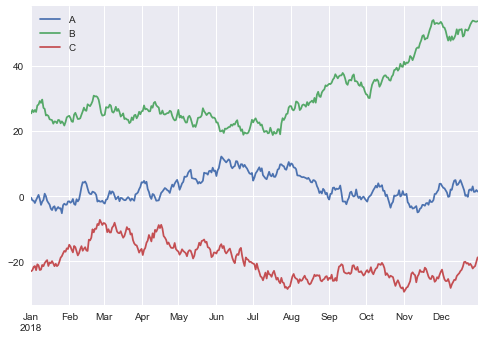

In [10]:
# TIME-SERIES DATA SET
# set a random seed for controlling randomization

import pandas as pd
import numpy as np

np.random.seed(777)
data = pd.DataFrame({'A': np.random.randn(365).cumsum(),
                     'B': np.random.randn(365).cumsum() +25,
                     'C': np.random.randn(365).cumsum() -25 },
                        index = pd.date_range('1/1/2018', periods=365))
data.plot()
                    

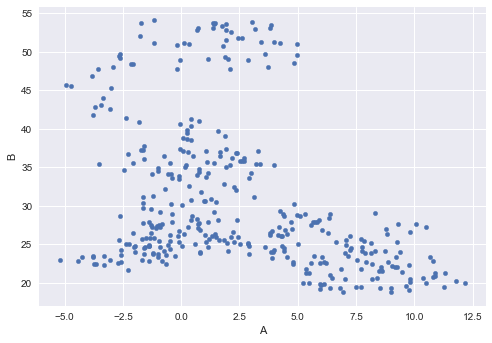

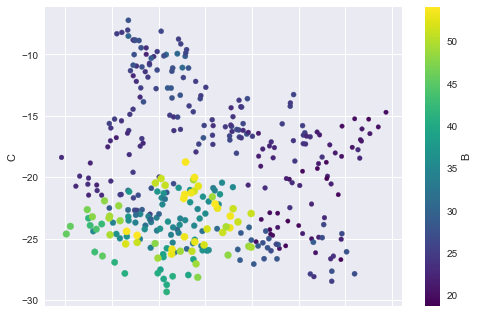

In [11]:
data.plot('A','B', kind='scatter');
# A and C columns plotted with graduating color and changing size based on values in the B column. 
data.plot.scatter('A', 'C',
                   c = 'B',
                   s = data['B'],
                   colormap='viridis');

In [ ]:
colormap = ('skyblue', 'salmon', 'lightgreen')
plt.figure()
pd.plotting.parallel_coordinates(df, 'column', color=colormap);

pd.plotting.scatter_matrix(df);